In [1]:
library(sphunif)
library(FNN)
library(Directional)

Loading required package: Rcpp


Attaching package: ‘Directional’


The following object is masked from ‘package:FNN’:

    knn.reg




In [2]:
setwd('/home/ejam/documents/citrus/preproc/merged')
filename <- 'volumes_and_sphericities.csv'
data <- read.csv(filename, header=T)

In [3]:
data

citrus_id,label,kind,whole,exocarp,endocarp,rind,spine,mesocarp,oil_glands,num_glands,wadell,krumbein,corey,sneed,janke,equancy,rho,area,volume
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C01_CRC2317_18B-18-9,L00,Lemons and Lemon Hybrids,160.68761,34.10452,88.07755,47.45002,6.902806,40.547212,0.2289402,8217,0.9988485,0.9580655,0.9287687,0.9519301,0.9505751,0.9120114,0.9913006,131.55220,141.63494
C01_CRC2317_18B-18-9,L01,Lemons and Lemon Hybrids,86.99295,16.59715,50.56161,26.25946,3.501201,22.758259,0.1809074,5768,0.9998340,0.9815674,0.9755277,0.9836178,0.9834131,0.9654872,0.9987625,85.07801,73.77202
C01_CRC2317_18B-18-9,L02,Lemons and Lemon Hybrids,82.89804,16.71514,51.14017,20.91145,1.698778,19.212670,0.1721818,6005,0.9988585,0.9585289,0.9288200,0.9519651,0.9506229,0.9124860,0.9913681,86.85977,75.99024
C01_CRC2317_18B-18-9,L03,Lemons and Lemon Hybrids,62.71774,14.89298,37.67197,14.99881,1.627702,13.371095,0.1755420,5817,0.9994108,0.9763291,0.9448988,0.9629200,0.9622247,0.9401268,0.9954830,70.87128,56.05254
C02_CRC3919_18A-24-1,L00,Lemons and Lemon Hybrids,103.97098,23.08261,61.02448,26.68925,1.951175,24.738073,0.5737687,13185,0.9973451,0.9213450,0.9303065,0.9529805,0.9496769,0.8780238,0.9815717,100.58081,94.47452
C02_CRC3919_18A-24-1,L01,Lemons and Lemon Hybrids,82.51668,14.13483,49.92322,24.92557,1.565959,23.359607,0.7544769,12603,0.9983502,0.9380873,0.9406979,0.9600638,0.9580192,0.9006237,0.9882861,86.50491,75.46740
C02_CRC3919_18A-24-1,L02,Lemons and Lemon Hybrids,79.67638,16.26302,52.26530,16.88570,1.028701,15.856999,0.7035873,12192,0.9974409,0.9229035,0.9298675,0.9526807,0.9495025,0.8792324,0.9821848,84.74535,73.07662
C03_CRC3593_18A-8-3,L00,Lemons and Lemon Hybrids,250.14192,29.41794,164.00477,75.10716,6.173145,68.934015,0.3816482,6596,0.9823098,0.8045264,0.8402629,0.8904512,0.8684139,0.7163915,0.8985804,184.80773,229.99941
C03_CRC3593_18A-8-3,L01,Lemons and Lemon Hybrids,241.57168,33.66851,174.71799,49.25831,4.264144,44.993771,0.3669948,6317,0.9887955,0.8422283,0.8744104,0.9144154,0.9003820,0.7701465,0.9311715,180.62614,224.44217


In [52]:
set.seed(42)
M <- 100
knn_max <- 25
KNN0 <- matrix(0, nrow=M, ncol=knn_max)

sph_unif <- sphunif::r_unif_sph(data$num_glands[i], 3, M)
for(j in 1:M){
    dists <- FNN::knn.dist(sph_unif[,,j], k=knn_max)
    avgs <- base::colMeans(dists)
    KNN0[j,] <- avgs
}

In [55]:
set.seed(42)
M <- 100
knn_max <- 25
KNN0 <- base::matrix(0, nrow=M, ncol=knn_max)
KNN <- base::matrix(0, nrow=nrow(data), ncol=knn_max)

for(i in 1:nrow(data)){
    sph_unif <- sphunif::r_unif_sph(data$num_glands[i], 3, M)
    for(j in 1:M){
        dists <- FNN::knn.dist(sph_unif[,,j], k=knn_max)
        avgs <- base::colMeans(dists)
        KNN0[j,] <- avgs
    }
    avgs <- base::colMeans(KNN0)
    KNN[i,] <- avgs
}

In [57]:
filename <- 'uniform_distribution_knn.csv'
MASS::write.matrix(KNN, filename, sep=',')

In [20]:
set.seed(42)
knn_max <- 100
KNN <- base::matrix(0, nrow=nrow(data), ncol=knn_max)

for(i in 1:nrow(data)){
    bingham <- Directional::f.rbing(data$num_glands[i], c(2,1), fast=TRUE)[[1]]
    dists <- FNN::knn.dist(bingham, k=knn_max)
    avgs <- base::colMeans(dists)
    KNN[i,] <- avgs
}

In [21]:
filename <- 'bingham_distribution_2,1_knn.csv'
MASS::write.matrix(KNN, filename, sep=',')

In [25]:
set.seed(42)
knn_max <- 100
KNN <- base::matrix(0, nrow=nrow(data), ncol=knn_max)

for(i in 1:nrow(data)){
    vmf <- Directional::rvmf(data$num_glands[i], c(0,0,1), k=1)
    dists <- FNN::knn.dist(vmf, k=knn_max)
    avgs <- base::colMeans(dists)
    KNN[i,] <- avgs
}

In [26]:
filename <- 'vmf_distribution_10_knn.csv'
MASS::write.matrix(KNN, filename, sep=',')

In [8]:
data$num_glands[i]

[1] 9021

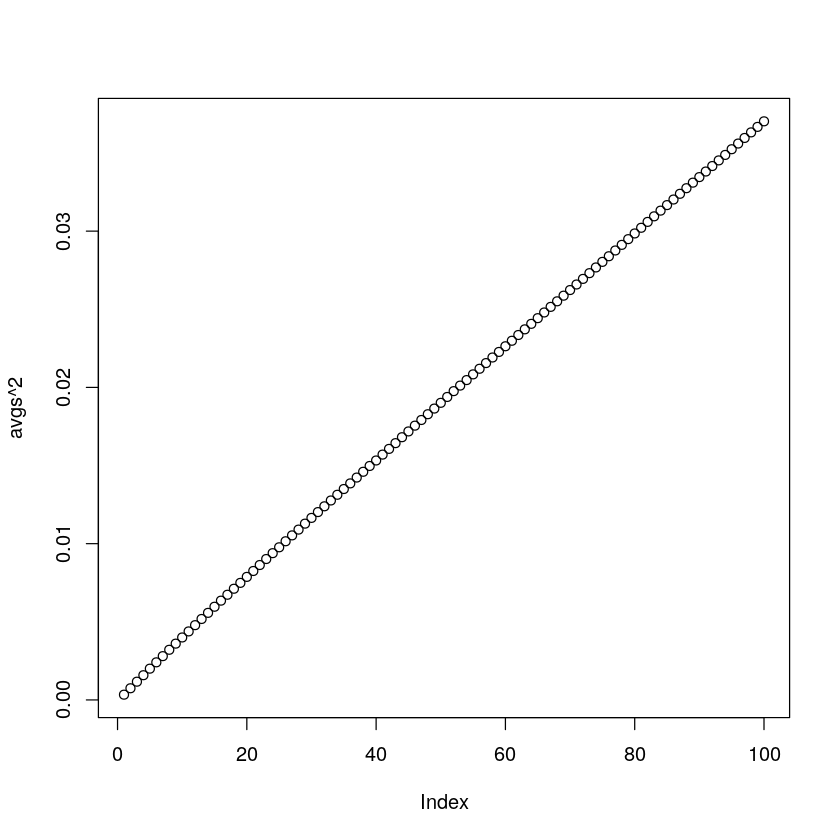

In [14]:
bingham <- Directional::f.rbing(5000, c(10,1), fast=TRUE)[[1]]
dists <- FNN::knn.dist(bingham, k=100)
avgs <- base::colMeans(dists)

plot(avgs**2)

# Test uniformity

In [4]:
src <- '~/documents/citrus/preproc/oil/'
footpoints <- 'geocentric'
type_tests <- c('PAD', 'PCvM', 'PRt', 'Rayleigh', 'Rayleigh_HD')

for(i in 151:nrow(data)){
  bname <- data$citrus_id[i]
  lname <- data$label[i]
  
  results <- c(bname, lname)
  filename <- paste(src, bname, '/', lname, '/', bname, '_', lname, '_', footpoints, '.csv', sep = '')
  p_coords <- read.csv(filename, header=F)
  
  theta <- base::ifelse(p_coords[,1] > 0, p_coords[,1], 2*pi + p_coords[,1])
  phi <- .5*pi - p_coords[,2]
  sph_data <- cbind(cos(theta) * sin(phi), sin(theta) * sin(phi), cos(phi))
  
  unif <- sphunif::unif_test(data = sph_data, type = type_tests, p_value = 'asymp')
  for(j in 1:length(type_tests)){
    results <- c(results, unif[[j]]$statistic, unif[[j]]$p.value)
  }
  outname <- paste('sphunif/', bname, '_', lname, '_sphunif.csv', sep='')
  write.table(t(results), outname, col.names = FALSE, row.names=FALSE, sep=',')
}

Series truncated from 10000 to 10000 terms (difference <= 0 with the HBE tail probability; last weight = 4.999e-13).

Series truncated from 10000 to 10000 terms (difference <= 0 with the HBE tail probability; last weight = 6.249e-14).

Warning message in FUN(X[[i]], ...):
“Note that Qq + abserr is positive.”
Series truncated from 10000 to 10000 terms (difference <= 0 with the HBE tail probability; last weight = 5.702e-14).

Warning message in FUN(X[[i]], ...):
“Note that Qq + abserr is positive.”
Series truncated from 10000 to 10000 terms (difference <= 0 with the HBE tail probability; last weight = 4.999e-13).

Warning message in FUN(X[[i]], ...):
“Note that Qq + abserr is positive.”
Series truncated from 10000 to 10000 terms (difference <= 0 with the HBE tail probability; last weight = 6.249e-14).

Series truncated from 10000 to 10000 terms (difference <= 0 with the HBE tail probability; last weight = 5.702e-14).

Series truncated from 10000 to 10000 terms (difference <= 0 with the H